# Data Cleaning

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted

##  Data Cleaning consists of

* Handeling Missing Data
* Encoding techniques or Handeling Categorical Features
* Transformation for variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

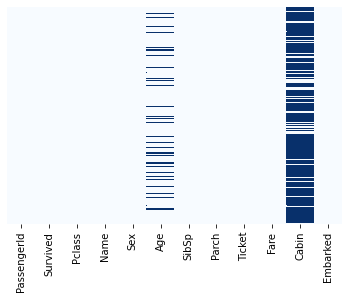

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
# We can see the amount of missing data in our data frame

## 1- a- Handeling Missing Data for numerical(discrete and continious) features

### What are different types of handeling missing data?
**a- Missing Completely at Random(MCAR)**:- A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

**b- Missing not at Random(MNAR)**:-There is a relationship between the propensity of a value to be missing and its values. In other words, data are missing not at random when the missing values of a variable are related to the values of that variable itself, even after controlling for other variables.

**c- Missing at Random(MAR)**:- Missing at Random means the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data. In other words, if the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random 

#### All techniques to handle missing values:-


**( i )- Mean/Median/Mode imputation:-** We use this technique when we are dealing with missing completely at random(MCAR).In this technique we solve the missing NAN values by replacing it with the mean/median/mode of the values given.

**( ii )- Random Sample imputation:-** We use this technique when we are dealing with missing completely at random(MCAR).In this technique we solve the missing NAN values by replacing it with the random values selected values for the dataset.

In [48]:
data=pd.read_csv('titanic.csv', usecols=['Age','Survived','Embarked'])
data.head()

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S


In [49]:
data.isnull().sum()

Survived      0
Age         177
Embarked      2
dtype: int64

In [56]:
# defining a function in order to create new feature i.e. Age_median and Age_random to see what best for our need.
def impute_nan(data,variable):
    data[variable + '_median']=data[variable].fillna(data[variable].median())
    data[variable + '_random']=data[variable]
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(), variable +'_random'] =random_sample
    

In [57]:
#Calling the functions
impute_nan(data,'Age')

In [68]:
data.head()

,Survived,Age,Embarked,Age_median,Age_random
0,0,22.0,S,22.0,22.0
1,1,38.0,C,38.0,38.0
2,1,26.0,S,26.0,26.0
3,1,35.0,S,35.0,35.0
4,0,35.0,S,35.0,35.0


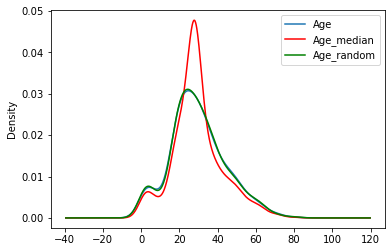

In [78]:
# We can see the 2 new features have been added, inorder to check what best suits our requirement we can see from our rest.
#In this example we can see the Random sample imputation best suits are requirement
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


### Note:-
* Both techniques are easy to implement
* Faster way to obtain the complete dataset
* Mean/Median/mode imputation affects the correlation and can change the original variance(as seen in the above graph)
* Random sample imputation causes less distortion in variance, but in every situation it can not be used.


**( iii )- Capturing NAN values with a new feature :-** We use this technique when we are dealing with missing data not at random(MNAR).In this technique we replace the missing NAN values by any other value of our choice.
 
 

In [32]:
data=pd.read_csv('titanic.csv', usecols=['Age','Survived','Fare'])

In [33]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
# Created a new feature where the missing NAN value is represented by 1 
data['Age_NAN']=np.where(data['Age'].isnull(),'1','0')

In [36]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
Age_NAN       0
dtype: int64

In [37]:
data.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Note:-
* 1- Easy to implement and it captures the importance of missingness
* 2- It create additional features

 **( iv )- End of distribution imputation:-** We use this technique when we are dealing with missing data not at random(MNAR).In this technique we replace the missing value from far end of distribution.

In [34]:
data=pd.read_csv('titanic.csv', usecols=['Age','Survived','Fare'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

<AxesSubplot:>

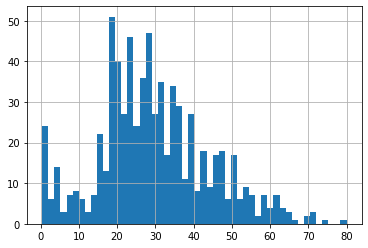

In [36]:
#The distribution of our Age is shown below in form of histogram
data['Age'].hist(bins=50)

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

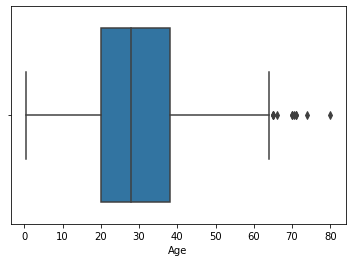

In [37]:
# The box plot shows that there are outliers in our dataset.
sns.boxplot(data['Age'])

In [38]:
#In order to find the extreme end of distribution
extreme=data['Age'].mean()+3*data['Age'].std()

In [39]:
def impute_nan(data,variable,extreme):
    data[variable + '_end_dist']=data[variable].fillna(extreme)

In [40]:
impute_nan(data,'Age',extreme)
data.head(5)

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36.,  47.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3., 177.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

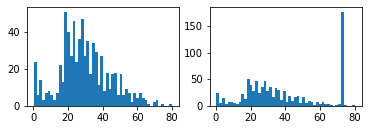

In [42]:
plt.subplot(2,2,1)
plt.hist(data['Age'],bins=50)
plt.subplot(2,2,2)
plt.hist(data['Age_end_dist'],bins=50)

In [43]:
#We can infer from the above graph that NAN values are filled by end of distribution so the peak is in the right of distribution


C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_dist'>

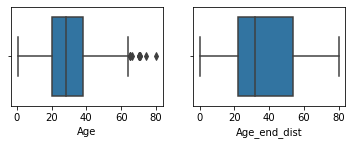

In [44]:
plt.subplot(2,2,1)
sns.boxplot(data['Age'])
plt.subplot(2,2,2)
sns.boxplot(data['Age_end_dist'])

* Note- 
* 1-We can see from the above boxplot that this technique captures the outliers.
* 2-It also gives the importance of missingness


**( v )- Arbitrary Value imputation:-** In this technique we replace the missing NAN value with an arbitrary value of our choice.

In [46]:
data=pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [48]:
def impute_nan(data,variable):
    data[variable + '_zero']=data[variable].fillna(0)
    data[variable +'_hundred']=data[variable].fillna(100)

In [51]:
impute_nan(data,'Age')
data.head()


,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.,   0., 177.]),
 array([  0.42 ,  10.378,  20.336,  30.294,  40.252,  50.21 ,  60.168,
         70.126,  80.084,  90.042, 100.   ]),
 <BarContainer object of 10 artists>)

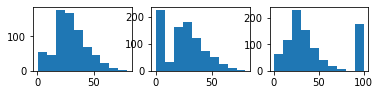

In [54]:
plt.subplot(3,3,1)
plt.hist(data['Age'],bins=10)
plt.subplot(3,3,2)
plt.hist(data['Age_zero'],bins=10)
plt.subplot(3,3,3)
plt.hist(data['Age_hundred'],bins=10)

* Note:
* 1-Easy to implement and captures the importance of missingess if there is one
* 2-Distorts the original distribution of the variable
* 3- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* 4- Hard to decide which value to use

## 1- b- Handeling Missing Data for Categorical Features

### Techniques to handle missing categorical features:-

**( i )-Frequent Category Imputation**

In [3]:
df=pd.read_csv('titanic.csv', usecols=['Sex','Cabin','Embarked','Survived'])
df.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


In [4]:
df.isnull().sum()

Survived      0
Sex           0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
def impute_nan(df,variable):
    frequent_category=df[variable].mode()[0]
    df[variable].fillna(frequent_category,inplace=True)

In [13]:
impute_nan(df,'Embarked')
df.isnull().sum()

Survived      0
Sex           0
Cabin       687
Embarked      0
dtype: int64

#The NAN values is changed in Embarked with the most frequent value
#### Note:-
* 1-  Easy and fast way to implement
* 2- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's and it distorts the relation of the most frequent label

**( ii )-Adding a variable to capture NAN**

In [16]:
df=pd.read_csv('titanic.csv', usecols=['Sex','Cabin','Embarked','Survived'])
df.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


In [17]:
df.isnull().sum()

Survived      0
Sex           0
Cabin       687
Embarked      2
dtype: int64

In [26]:
df['Cabin_new']=np.where(df['Cabin'].isnull(),"Missing",df['Cabin'])

In [31]:
df.head()

,Survived,Sex,Cabin,Embarked,Cabin_new
0,0,male,NaN,S,Missing
1,1,female,C85,C,C85
2,1,female,NaN,S,Missing
3,1,female,C123,S,C123
4,0,male,NaN,S,Missing
